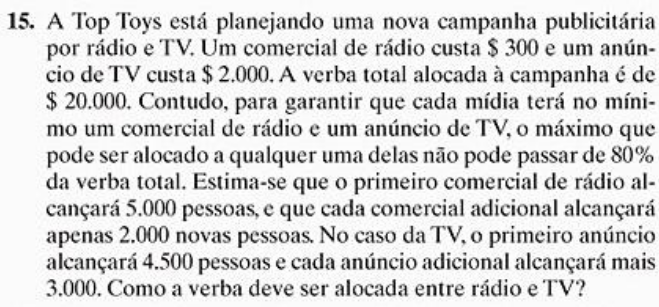

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Campanha_Publicitaria_TopToys')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos meios de propaganda para referência
meios = ['radio', 'tv']

# Dados financeiros
orcamento_total = 20000
custo_por_comercial = {'radio': 300, 'tv': 2000}

# Dados de Alcance (pessoas)
alcance_base_por_comercial = {'radio': 2000, 'tv': 3000}
alcance_bonus_primeiro_comercial = {
    'radio': 5000 - 2000, # Bônus de 3000
    'tv': 4500 - 3000      # Bônus de 1500
}

# Regras da campanha
limite_max_orcamento_por_meio = 0.80 * orcamento_total # $16.000

In [4]:
# 1. Variáveis de Decisão
# Número de comerciais de cada tipo (devem ser inteiros)
num_comerciais = model.integer_var_dict(meios, name='Num')


# 2. Função Objetivo
# Maximizar o alcance total de pessoas.
# A fórmula é: (alcance_base * Num) + Bônus_primeiro_anuncio
# Como Num >= 1 para ambos, o bônus é sempre aplicado.
expressao_alcance_base = (alcance_base_por_comercial[m] * num_comerciais[m] for m in meios)
soma_alcance_base = model.sum(expressao_alcance_base)
alcance_total = soma_alcance_base + alcance_bonus_primeiro_comercial['radio'] + alcance_bonus_primeiro_comercial['tv']
model.maximize(alcance_total)


# 3. Restrições

# Restrição 1: Orçamento Total da Campanha
expressao_custo = (custo_por_comercial[m] * num_comerciais[m] for m in meios)
soma_custo_total = model.sum(expressao_custo)
restr_orcamento_logica = soma_custo_total <= orcamento_total
model.add_constraint(restr_orcamento_logica, ctname='limite_orcamento_total')

# Restrição 2: Mínimo de um comercial por mídia
for m in meios:
    restr_min_comerciais_logica = num_comerciais[m] >= 1
    model.add_constraint(restr_min_comerciais_logica, ctname=f'min_comerciais_{m}')

# Restrição 3: Máximo de 80% do orçamento por mídia
for m in meios:
    custo_por_meio = custo_por_comercial[m] * num_comerciais[m]
    restr_max_orc_meio_logica = custo_por_meio <= limite_max_orcamento_por_meio
    model.add_constraint(restr_max_orc_meio_logica, ctname=f'max_orcamento_{m}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Found incumbent of value 9500.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 4 rows and 0 columns.
MIP Presolve modified 1 coefficients.
Reduced MIP has 1 rows, 2 columns, and 2 nonzeros.
Reduced MIP has 0 binaries, 2 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 1 rows, 2 columns, and 2 nonzeros.
Reduced MIP has 0 binaries, 2 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.00 sec. (0.00 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer